#### Numerical Integration
To solve the given expression using left side sum, trapezoidal, and simpson

Text(0.5, 1.0, 'Plot of sin x/x')

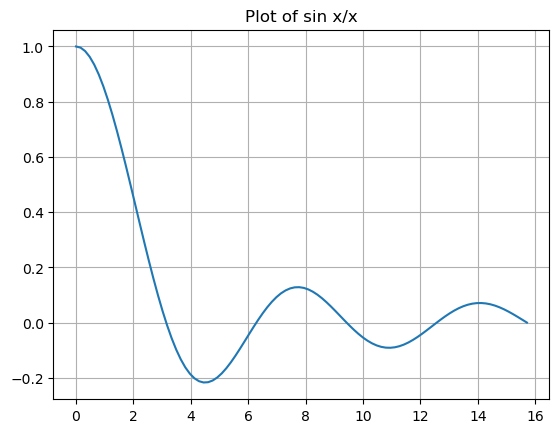

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import pandas as pd


# Set global display format to 9 decimal places
pd.options.display.float_format = '{:.12f}'.format

# Integration limits GLOBAL
a,b = 1e-6, 5*np.pi

# fn is sin x/x
def f(x):
    return np.sin(x)/x

# plotting graph for ease of use later on
x = np.linspace(a, b, 100)
plt.plot(x, f(x))
plt.grid()
plt.title("Plot of sin x/x")

In [34]:
def left_sum(a,b,N):
    x = np.linspace(a, b, N)
    h = (b - a) / (N)
    integral_sum = 0
    for i in range(N - 1):
        integral_sum += f(x[i]) * h
    return integral_sum

def trapezoidal(a,b,N):
    # Grid spacing
    h = (b - a) / N
    
    # Computing sum of first and last terms (h factor added at last)
    trap = (f(a) + f(b))/2 

    # Adding middle terms in above formula
    i = 1
    while i <= N:
        trap += f(a + i * h)
        i += 1
        
    trap = trap*h
    return trap

def simpsons(a, b, N ):
    x = []
    fx = []
    
    h = (b - a) / N
    
    for i in range(0, N+1): # creating the x array
        x.append(a+i*h)
        fx.append(f(x[i]))
        
    simpson = 0
    i = 0
    while i<= N:
        if i == 0 or i == N:
            simpson+= fx[i]
        elif i % 2 != 0:
            simpson+= 4 * fx[i]
        else:
            simpson+= 2 * fx[i]
        print(f"{i},{simpson}")
        i+= 1
        
    simpson = simpson * (h / 3)
    return simpson

## 2.1 Part 1
Calculate the integrals using all 3 methods, and display the values for N=1,10,100 ... 

In [ ]:
# actual value of the integral
integral, _ = integrate.quad(f,a,b)


integral_values = [] # dictionary to be converted into dataframe later
absolute_errors = [] # for each iteration, this will hold the val: A-A_quad

# contains data in the format [N, left_sum, trapezoid, simpson]

for k in range(8):
    N = 10**k # as given in question
    
    # a, b defined already globally
    
    integral_sum = left_sum(a,b,N)
    integral_trap = trapezoidal(a,b,N)
    integral_simpson = simpsons(a,b,N)
    
    integral_values.append([N, integral_sum, integral_trap, integral_simpson])
    absolute_errors.append([
        N, 
        abs(integral_sum-integral),
        abs(integral_trap-integral),
        abs(integral_simpson-integral),
    ])

# converting into dataframes
cols = ["N", "Left Sum", "Trapezoidal", "Simpson's"]

#displaying the result dataframe
integral_valuesDF = pd.DataFrame(integral_values, columns=cols)
integral_valuesDF

0,0.9999999999998334
1,0.9999999999998334
0,0.9999999999998334
1,3.546477630444919
2,3.5464771211492305
3,2.697650884081229
4,2.6976510750671427
5,3.2069468605383675
6,3.206946775655735
7,2.843164058513902
8,2.84316409034489
9,3.126106209395741
10,3.126106209395741
0,0.9999999999998334
1,4.983570734139468
2,6.950833817073985
3,10.804424269048228
4,12.675402450154387
5,16.27666677997464
6,17.993453622848694
7,21.234780249320266
8,22.748433050907
9,25.543017995099188
10,26.81625681032173
11,29.10273504323173
12,30.11183658845
13,31.85716544227519
14,32.592930715959206
15,33.793351017423355
16,34.26109496219759
17,34.94113912211614
18,35.159723316654734
19,35.36938381598626
20,35.36938330669057
21,35.17968855162149
22,35.00084604573677
23,34.498203082655856
24,34.18637305806723
25,33.46611960251024
26,33.06993775759885
27,32.22959333692187
28,31.79712089017906
29,30.92983551188284
30,30.505422393348837
31,29.694091078838973
32,29.31567784931981
33,28.62812378429285
34,28.325161487714315
3

#### Part 2.1 question 2
Comparing absolute values of error in log log plot. Error going to zero the fastest gives the best convergence. Simpson should lead.

In [22]:
# displaying the dataframe containing errors
absolute_errorsDF = pd.DataFrame(absolute_errors, columns=cols)
absolute_errorsDF


,N,Left Sum,Trapezoidal,Simpson's
0,1,1.633963846103,6.220017287870,3.602023576546
1,10,0.606683928571,0.013645975668,0.002861433323
2,100,0.062067897515,0.000130951542,0.000000210668
3,1000,0.006218706982,0.000001308995,0.000000000021
4,10000,0.000621988638,0.000000013090,0.000000000000
5,100000,0.000062200042,0.000000000131,0.000000000000


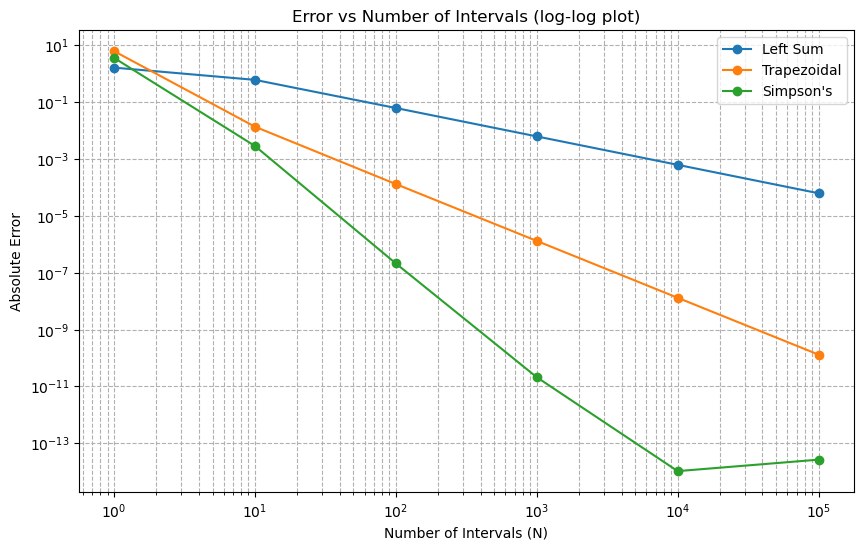

1.6339638461028352

In [23]:
plt.figure(figsize=(10, 6))
plt.loglog(absolute_errorsDF["N"], absolute_errorsDF["Left Sum"], label="Left Sum", marker='o')
plt.loglog(absolute_errorsDF["N"], absolute_errorsDF["Trapezoidal"], label="Trapezoidal", marker='o')
plt.loglog(absolute_errorsDF["N"], absolute_errorsDF["Simpson's"], label="Simpson's", marker='o')
plt.xlabel("Number of Intervals (N)")
plt.ylabel("Absolute Error")
plt.title("Error vs Number of Intervals (log-log plot)")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()



## Demo/trials for logic or concepts before implementation


In [24]:
# import pandas as pd

# data = {
#     'Name': ['Alice', 'Bob', 'Charlie'],
#     'Age': [25, 30, 35],
#     'City': ['New York', 'Paris', 'London']
# }
# df = pd.DataFrame(data)

# # In Jupyter, simply typing the DataFrame name displays it in a tabular format.
# df


In [25]:
# df = pd.DataFrame(columns=['x', 'x^2'])

# # Step 2: Use a for loop to generate values of x and x^2
# data = []

# for x in range(1, 11):
#     data.append({'x': x, 'x^2': x ** 2})

# df = pd.DataFrame(data)


# # Display the resulting DataFrame

In [26]:
# import pandas as pd

# # Create a DataFrame with columns 'x', 'square', 'cube'
# df = pd.DataFrame(columns=['x', 'square', 'cube'])

# # Add one row with the value x=1, and the square and cube of x
# for i in range(0,8):
#     new_row = pd.DataFrame({'x': [i], 'square': [i**2], 'cube': [i**3]})
#     df = pd.concat([df, new_row], ignore_index=True)
    
# plt.plot(df['x'], df['x'], label="x")
# plt.plot(df['x'], df["square"], label="x2")
# plt.plot(df['x'], df['cube'], label="x3")
# plt.legend()



# # Display the DataFrame to verify the columns
# # d

In [27]:
# arr = np.array(df['square'].astype(float)           
#     .to_numpy())
# arr.dtype
# np.log(arr)

In [28]:
# array = np.array([0, 1, 2, 33, 4, 5, 6, 7, 8,])
# np.log(array)

In [29]:
# def simpsons_trial(a,b,N):
#     x = np.linspace(a,b,N)
#     h = (b-a)/N

#     integral_simp = 0 
#     for i in range (0, N-1): # continues up until the second last index, as last index is included in the calculated term
#         mid = (x[i] + x[i+1])/2 # midpoint used to calculate the An
#         integral_simp += ( 
#                           f(x[i]) + 4*f(mid) + f(x[i+1]) 
#                           )*(h/6)
        
#     return integral_simp

# # running to check validity
# N = 100000
# x_vals = np.linspace(a,b,N)

# print(f"For {N} intervals, we have : {simpsons_trial(a,b,N)}")
# print(f"Direct Integration: {integrate.simpson(f(x),x)}")




In [30]:
a,b =1e-6,100
N = 10
h = (b-a)/N

print(f"x: {x}")

x = []
fx = []
    
for i in range(0, N+1): # creating the x array
    x.append(a+i*h)
    fx.append(f(x[i]))
    
simpson = 0
i = 0
while i<= N:
    if i == 0 or i == N:
        simpson+= fx[i]
    elif i % 2 != 0:
        simpson+= 4 * fx[i]
    else:
        simpson+= 2 * fx[i]
    print(f"{i},{simpson}")
    i+= 1
    
simpson = simpson * (h / 3)

simpson

x: [1.00000000e-06 1.58667286e-01 3.17333571e-01 4.75999857e-01
 6.34666142e-01 7.93332428e-01 9.51998713e-01 1.11066500e+00
 1.26933128e+00 1.42799757e+00 1.58666386e+00 1.74533014e+00
 1.90399643e+00 2.06266271e+00 2.22132900e+00 2.37999528e+00
 2.53866157e+00 2.69732785e+00 2.85599414e+00 3.01466043e+00
 3.17332671e+00 3.33199300e+00 3.49065928e+00 3.64932557e+00
 3.80799185e+00 3.96665814e+00 4.12532442e+00 4.28399071e+00
 4.44265699e+00 4.60132328e+00 4.75998957e+00 4.91865585e+00
 5.07732214e+00 5.23598842e+00 5.39465471e+00 5.55332099e+00
 5.71198728e+00 5.87065356e+00 6.02931985e+00 6.18798614e+00
 6.34665242e+00 6.50531871e+00 6.66398499e+00 6.82265128e+00
 6.98131756e+00 7.13998385e+00 7.29865013e+00 7.45731642e+00
 7.61598271e+00 7.77464899e+00 7.93331528e+00 8.09198156e+00
 8.25064785e+00 8.40931413e+00 8.56798042e+00 8.72664670e+00
 8.88531299e+00 9.04397928e+00 9.20264556e+00 9.36131185e+00
 9.51997813e+00 9.67864442e+00 9.83731070e+00 9.99597699e+00
 1.01546433e+01 1.031

2.6736608439830873

In [31]:
integrate.simpson(fx,x)

C:\Users\soumy\AppData\Local\Temp\ipykernel_12176\1204105762.py:1: DeprecationWarning: You are passing x=[1e-06, 10.0000009, 20.000000800000002, 30.000000700000005, 40.0000006, 50.0000005, 60.000000400000005, 70.0000003, 80.0000002, 90.00000010000001, 100.0] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  integrate.simpson(fx,x)


2.6736608439830865

In [32]:
print(x)

x_np=  np.linspace(a,b,N+1) # creates N+1 data points equally spaced in the interval
fx_np = f(x_np)

h = (b-a)/N

for i in range (0, N+1):
    if i == 0 or i == N:
        simpson+= fx_np[i]
    elif i % 2 != 0:
        simpson+= 4 * fx_np[i]
    else:
        simpson+= 2 * fx_np[i]
    print(f"{i},{simpson}")
simpson = simpson * (h / 3)
    
simpson

[1e-06, 10.0000009, 20.000000800000002, 30.000000700000005, 40.0000006, 50.0000005, 60.000000400000005, 70.0000003, 80.0000002, 90.00000010000001, 100.0]
0,3.673660843982921
1,3.456052117146296
2,3.547346671213812
3,3.415609138805474
4,3.4528647762624582
5,3.431874826774687
6,3.421714460106843
7,3.465936795434668
8,3.441089578596766
9,3.480822761610093
10,3.4757591051989953


11.585863568138015